# 2DoF forward kinematics
2自由度マニピュレータの順運動学です。

## Denavit-Hartenberg parameters
DHパラメータは下記の通り。

|$^{i-1}T_i$|$a_i$|$\alpha_i$|$d_i$|$\theta_i$|
|---|---|---|---|---|
|$^{B}T_1$  |0    |0         |0    |$\theta_1$|
|$^{1}T_2$  |1    |0         |0    |$\theta_2$|
|$^{2}T_E$  |1    |0         |0    |0         |

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Homogeneous transformation matrix
# 同次変換行列
def trans_m(a, alpha, d, theta):
    m = np.array([[np.cos(theta), -np.sin(theta), 0, a],
                  [np.cos(alpha)*np.sin(theta), np.cos(alpha)*np.cos(theta), -np.sin(alpha), -np.sin(alpha)*d],
                  [np.sin(alpha)*np.sin(theta), np.sin(alpha)*np.cos(theta),  np.cos(alpha),  np.cos(alpha)*d],
                  [0, 0, 0, 1]])
    return m

In [3]:
# 関節角の指定
theta = np.array([[np.pi/6],
                  [np.pi/2]])

# DHパラメータより同次変換行列を求める
tm0_1 = trans_m(0, 0, 0, theta[0,0])
tm1_2 = trans_m(1, 0, 0, theta[1,0])
tm2_3 = trans_m(1, 0, 0, 0)

# 基準座標系から見た各座標系の位置姿勢を計算
pos = [tm0_1[0:2,3:4],
       tm0_1.dot(tm1_2)[0:2,3:4],
       tm0_1.dot(tm1_2).dot(tm2_3)[0:2,3:4]]

In [4]:
# マニピュレータの描画
def draw(pos):
    fig = plt.figure(figsize=(5,5))
    sp = fig.add_subplot(111,aspect='equal')
    sp.set_xlim(-2,2)
    sp.set_ylim(-2,2)
    xs = [e[0] for e in pos]
    ys = [e[1] for e in pos]
    plt.plot(xs, ys,"-", color="skyblue", lw=5, label="link")
    plt.plot(xs, ys,"o", color="orange", ms=10, label="joint")
    plt.grid()
    plt.legend(fontsize=10)
    plt.show()

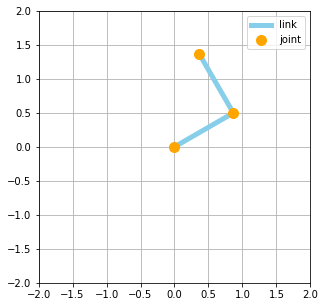

In [5]:
draw(pos)